In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


#**Importing Libraries & dataset**

In [0]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [0]:

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/wifi_localization.txt',delimiter= "\t", encoding = 'ISO-8859-1')



In [4]:
print(df[:20])

    -64  -56  -61  -66  -71  -82  -81  1
0   -68  -57  -61  -65  -71  -85  -85  1
1   -63  -60  -60  -67  -76  -85  -84  1
2   -61  -60  -68  -62  -77  -90  -80  1
3   -63  -65  -60  -63  -77  -81  -87  1
4   -64  -55  -63  -66  -76  -88  -83  1
5   -65  -61  -65  -67  -69  -87  -84  1
6   -61  -63  -58  -66  -74  -87  -82  1
7   -65  -60  -59  -63  -76  -86  -82  1
8   -62  -60  -66  -68  -80  -86  -91  1
9   -67  -61  -62  -67  -77  -83  -91  1
10  -65  -59  -61  -67  -72  -86  -81  1
11  -63  -57  -61  -65  -73  -84  -84  1
12  -66  -60  -65  -62  -70  -85  -83  1
13  -61  -59  -65  -63  -74  -89  -87  1
14  -67  -60  -59  -61  -71  -86  -91  1
15  -63  -56  -60  -62  -70  -84  -91  1
16  -60  -54  -59  -65  -73  -83  -84  1
17  -60  -58  -60  -61  -73  -84  -88  1
18  -62  -59  -63  -64  -70  -84  -84  1
19  -63  -59  -64  -66  -72  -84  -90  1


##About Dataset

### 1.   We have dataset of 2000 records
### 2.   For each room 500 records are taken.
### 3.   In each room, data is recorded for 7 different location.


In [0]:
pd.set_option('display.max_columns',250) #for displaying all the column value

In [0]:
column_names = [
'WS1',
'WS2',
'WS3',
'WS4',
'WS5',
'WS6',
'WS7',
'Location']

In [0]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/wifi_localization.txt',delimiter= "\t", encoding = 'ISO-8859-1',names=column_names)

In [8]:
print(df[:10])

   WS1  WS2  WS3  WS4  WS5  WS6  WS7  Location
0  -64  -56  -61  -66  -71  -82  -81         1
1  -68  -57  -61  -65  -71  -85  -85         1
2  -63  -60  -60  -67  -76  -85  -84         1
3  -61  -60  -68  -62  -77  -90  -80         1
4  -63  -65  -60  -63  -77  -81  -87         1
5  -64  -55  -63  -66  -76  -88  -83         1
6  -65  -61  -65  -67  -69  -87  -84         1
7  -61  -63  -58  -66  -74  -87  -82         1
8  -65  -60  -59  -63  -76  -86  -82         1
9  -62  -60  -66  -68  -80  -86  -91         1


In [9]:
df.Location.unique()

array([1, 2, 3, 4])

In [10]:
df_clean = df.dropna() #drop any null value row
df.shape

(2000, 8)

In [0]:
df_unique = df_clean.drop_duplicates(keep='first', inplace=False) #removing dulicates

In [0]:
outcome_list = df_unique['Location'].tolist()

In [13]:
print(outcome_list[:10])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [0]:
LocList = np.array(outcome_list)

## One hot encoding  of Y

In [0]:
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}_{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

In [0]:
# columns
columns_new = ['Location']

# pass in array and columns
df_y = pd.DataFrame(LocList , columns=columns_new)

In [17]:
print(df_y[:10])

   Location
0         1
1         1
2         1
3         1
4         1
5         1
6         1
7         1
8         1
9         1


In [0]:
encode_text_dummy(df_y,'Location')

In [19]:
print(df_y[:10])

   Location_1  Location_2  Location_3  Location_4
0           1           0           0           0
1           1           0           0           0
2           1           0           0           0
3           1           0           0           0
4           1           0           0           0
5           1           0           0           0
6           1           0           0           0
7           1           0           0           0
8           1           0           0           0
9           1           0           0           0


In [20]:
print(df[:10])

   WS1  WS2  WS3  WS4  WS5  WS6  WS7  Location
0  -64  -56  -61  -66  -71  -82  -81         1
1  -68  -57  -61  -65  -71  -85  -85         1
2  -63  -60  -60  -67  -76  -85  -84         1
3  -61  -60  -68  -62  -77  -90  -80         1
4  -63  -65  -60  -63  -77  -81  -87         1
5  -64  -55  -63  -66  -76  -88  -83         1
6  -65  -61  -65  -67  -69  -87  -84         1
7  -61  -63  -58  -66  -74  -87  -82         1
8  -65  -60  -59  -63  -76  -86  -82         1
9  -62  -60  -66  -68  -80  -86  -91         1


## Making X ready

In [0]:
x_df=df.drop(df.columns[7],axis=1)

In [22]:
print(x_df[:10])

   WS1  WS2  WS3  WS4  WS5  WS6  WS7
0  -64  -56  -61  -66  -71  -82  -81
1  -68  -57  -61  -65  -71  -85  -85
2  -63  -60  -60  -67  -76  -85  -84
3  -61  -60  -68  -62  -77  -90  -80
4  -63  -65  -60  -63  -77  -81  -87
5  -64  -55  -63  -66  -76  -88  -83
6  -65  -61  -65  -67  -69  -87  -84
7  -61  -63  -58  -66  -74  -87  -82
8  -65  -60  -59  -63  -76  -86  -82
9  -62  -60  -66  -68  -80  -86  -91


## Min Max Normalization

In [0]:
def min_max_normalization(df,name):
   
   max_value = df[name].max()
   min_value = df[name].min()
   
   new_column = "{}_{}".format('normalized',name)
   
   df[new_column] = (df[name] - min_value) / (max_value - min_value)
   df.drop(name,axis=1,inplace = True) 




In [0]:
list_1 = ['WS1','WS2','WS3','WS4','WS5','WS6','WS7']
for i in list_1:
   min_max_normalization(df,i)

In [25]:
print(df[:10])

   Location  normalized_WS1  normalized_WS2  normalized_WS3  normalized_WS4  \
0         1        0.156250        0.620690        0.363636        0.166667   
1         1        0.093750        0.586207        0.363636        0.181818   
2         1        0.171875        0.482759        0.393939        0.151515   
3         1        0.203125        0.482759        0.151515        0.227273   
4         1        0.171875        0.310345        0.393939        0.212121   
5         1        0.156250        0.655172        0.303030        0.166667   
6         1        0.140625        0.448276        0.242424        0.151515   
7         1        0.203125        0.379310        0.454545        0.166667   
8         1        0.140625        0.482759        0.424242        0.212121   
9         1        0.187500        0.482759        0.212121        0.136364   

   normalized_WS5  normalized_WS6  normalized_WS7  
0        0.339623        0.416667        0.485714  
1        0.339623        0

In [26]:
df.shape

(2000, 8)

In [27]:
df_y.shape

(2000, 4)

In [0]:
from sklearn.model_selection import train_test_split

## Splitting Data for Sci-kit learn models

In [29]:
print(df_y[:10])

   Location_1  Location_2  Location_3  Location_4
0           1           0           0           0
1           1           0           0           0
2           1           0           0           0
3           1           0           0           0
4           1           0           0           0
5           1           0           0           0
6           1           0           0           0
7           1           0           0           0
8           1           0           0           0
9           1           0           0           0


In [30]:
print(x_df[:10])

   WS1  WS2  WS3  WS4  WS5  WS6  WS7
0  -64  -56  -61  -66  -71  -82  -81
1  -68  -57  -61  -65  -71  -85  -85
2  -63  -60  -60  -67  -76  -85  -84
3  -61  -60  -68  -62  -77  -90  -80
4  -63  -65  -60  -63  -77  -81  -87
5  -64  -55  -63  -66  -76  -88  -83
6  -65  -61  -65  -67  -69  -87  -84
7  -61  -63  -58  -66  -74  -87  -82
8  -65  -60  -59  -63  -76  -86  -82
9  -62  -60  -66  -68  -80  -86  -91


In [31]:
X=df.as_matrix(columns=None)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [0]:
Y=np.array(df_y)

In [0]:
x_train,x_test,y_train,y_test = train_test_split(X,LocList,test_size=0.25,random_state=1)

In [0]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

# KNN


In [35]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier()
clf_knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

# Plot an ROC. pred - the predictions, y - the expected output.
def plot_roc(pred,y):
    fpr, tpr, thresholds = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

test :  [2 4 3 3 3 4 2 1 3 2]
pred :  [2 4 3 3 3 4 2 1 3 2]

[[123   0   0   0]
 [  0 132   0   0]
 [  0   0 121   0]
 [  0   0   0 124]]

Precision Score::  1.0
Recall Score   ::  1.0
F1 Score       ::  1.0

Plotting confusion matrix


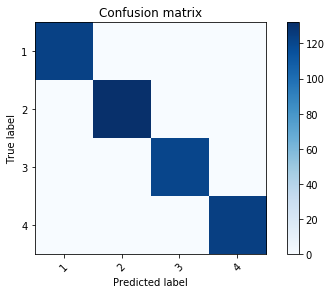


              precision    recall  f1-score   support

           1       1.00      1.00      1.00       123
           2       1.00      1.00      1.00       132
           3       1.00      1.00      1.00       121
           4       1.00      1.00      1.00       124

   micro avg       1.00      1.00      1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



In [37]:
from sklearn import metrics
y_pred_knn = clf_knn.predict(x_test)

print("test : ", y_test[:10])
print("pred : ", y_pred_knn[:10])

print()

cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_knn)

print()

print("Precision Score:: ",metrics.precision_score(y_test,y_pred_knn,average= "weighted"))   
print("Recall Score   :: ",metrics.recall_score(y_test,y_pred_knn,average= "weighted"))      
print("F1 Score       :: ",metrics.f1_score(y_test,y_pred_knn,average= "weighted")) 

print()

print('Plotting confusion matrix')
plt.figure()
plot_confusion_matrix(cm_knn, clf_knn.classes_)
plt.show()

print()

print(classification_report(y_test, y_pred_knn))


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

# Plot an ROC. pred - the predictions, y - the expected output.
def plot_roc(pred,y):
    fpr, tpr, thresholds = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

# SVM


In [39]:
from sklearn.svm import SVC

clf_svc = SVC()
clf_svc.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

test :  [2 4 3 3 3 4 2 1 3 2]
pred :  [2 4 3 3 3 4 2 1 3 2]

[[123   0   0   0]
 [  0 132   0   0]
 [  0   0 121   0]
 [  0   0   0 124]]

Precision Score::  1.0
Recall Score::     1.0
F1 Score::         1.0

Plotting confusion matrix


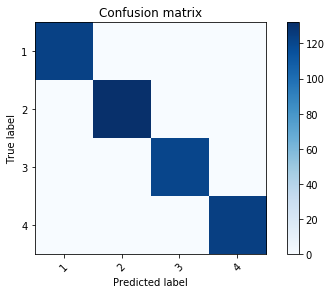


              precision    recall  f1-score   support

           1       1.00      1.00      1.00       123
           2       1.00      1.00      1.00       132
           3       1.00      1.00      1.00       121
           4       1.00      1.00      1.00       124

   micro avg       1.00      1.00      1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



In [40]:
y_pred_svm = clf_svc.predict(x_test)

print("test : ", y_test[:10])
print("pred : ", y_pred_svm[:10])

print()

cm_svm = confusion_matrix(y_test, y_pred_svm)
print(cm_svm)

print()

print("Precision Score:: ",metrics.precision_score(y_test,y_pred_svm,average= "weighted"))   
print("Recall Score::    ",metrics.recall_score(y_test,y_pred_svm,average= "weighted"))      
print("F1 Score::        ",metrics.f1_score(y_test,y_pred_svm,average= "weighted")) 

print()

print('Plotting confusion matrix')
plt.figure()
plot_confusion_matrix(cm_svm, clf_svc.classes_)
plt.show()

print()

print(classification_report(y_test, y_pred_svm))

# Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression()
clf_lr.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

test :  [2 4 3 3 3 4 2 1 3 2]
pred :  [2 4 3 3 3 4 2 1 3 2]

[[123   0   0   0]
 [  0 131   1   0]
 [  0   0 120   1]
 [  0   0   0 124]]

Precision Score::  0.996016
Recall Score   ::  0.996
F1 Score       ::  0.9960002137828882

Plotting confusion matrix


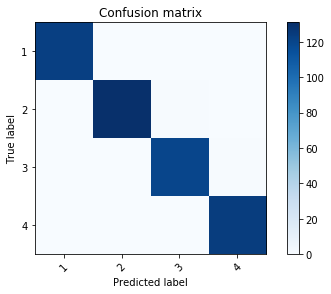


              precision    recall  f1-score   support

           1       1.00      1.00      1.00       123
           2       1.00      0.99      1.00       132
           3       0.99      0.99      0.99       121
           4       0.99      1.00      1.00       124

   micro avg       1.00      1.00      1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



In [42]:
y_pred_lr = clf_lr.predict(x_test)

print("test : ", y_test[:10])
print("pred : ", y_pred_lr[:10])

print()

cm_lr = confusion_matrix(y_test, y_pred_lr)
print(cm_lr)

print()
print("Precision Score:: ",metrics.precision_score(y_test,y_pred_lr,average= "weighted"))   
print("Recall Score   :: ",metrics.recall_score(y_test,y_pred_lr,average= "weighted"))      
print("F1 Score       :: ",metrics.f1_score(y_test,y_pred_lr,average= "weighted")) 
print()

print('Plotting confusion matrix')
plt.figure()
plot_confusion_matrix(cm_lr, clf_lr.classes_)
plt.show()

print()

print(classification_report(y_test, y_pred_lr))

# Neural Network

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20,random_state=1)

In [44]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [45]:
print(Y[:10])

[[1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]]


In [46]:
Y.shape

(2000, 4)

In [47]:
checkpointer = ModelCheckpoint(filepath="best_weights.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(3):
   print(i)
   model_classification = Sequential()
   model_classification.add(Dense(80, input_dim=X_train.shape[1], activation='relu')) # Hidden 1  
   model_classification.add(Dense(60, activation='relu')) # Hidden 2
   model_classification.add(Dense(4,activation='softmax')) # Output
   model_classification.compile(loss='binary_crossentropy', optimizer='adam')

   monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
   model_classification.fit(X_train, y_train,validation_data=(X_test,y_test),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)

0
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 1600 samples, validate on 400 samples
Epoch 1/1000
 - 1s - loss: 0.4588 - val_loss: 0.3565
Epoch 2/1000
 - 0s - loss: 0.2707 - val_loss: 0.1815
Epoch 3/1000
 - 0s - loss: 0.1241 - val_loss: 0.0757
Epoch 4/1000
 - 0s - loss: 0.0526 - val_loss: 0.0367
Epoch 5/1000
 - 0s - loss: 0.0276 - val_loss: 0.0224
Epoch 6/1000
 - 0s - loss: 0.0177 - val_loss: 0.0152
Epoch 7/1000
 - 0s - loss: 0.0124 - val_loss: 0.0110
Epoch 8/1000
 - 0s - loss: 0.0098 - val_loss: 0.0085
Epoch 9/1000
 - 0s - loss: 0.0071 - val_loss: 0.0068
Epoch 10/1000
 - 0s - loss: 0.0056 - val_loss: 0.0062
Epoch 11/1000
 - 0s - loss: 0.0045 - val_loss: 0.0048
Epoch 12/1000
 - 0s - loss: 0.0038 - val_loss: 0.0042
Epoch 13/1000
 - 0s - loss: 0.0031 - val_loss: 0.0036
Epoch 14/1000
 - 0s - loss: 0.0028 - val_loss: 0.0053
Epoch 15/1000
 - 0s - loss: 0.0025 - val_loss: 0.0030
Epoch 16/1000
 - 0s - loss: 0.

In [48]:
model_classification.load_weights('best_weights.hdf5')
pred = model_classification.predict(X_test)

pred = np.argmax(pred,axis=1) # raw probabilities to chosen class (highest probability)

y_true= np.argmax(y_test,axis=1) 

print("test", y_true[:25])
print("pred", pred[:25])

cm_nn = metrics.confusion_matrix(y_true,pred)
print(cm_nn)

pr_score = metrics.precision_score(y_true, pred, average= "weighted")
print("Precision score: {}".format(pr_score))

re_score = metrics.recall_score(y_true, pred, average= "weighted")
print("Recall score: {}".format(re_score))

f1_score = metrics.f1_score(y_true, pred, average= "weighted")
print("F1 score: {}".format(f1_score))

test [1 3 2 2 2 3 1 0 2 1 2 2 3 2 0 3 1 2 1 2 0 3 3 1 1]
pred [1 3 2 2 2 3 1 0 2 1 2 2 3 2 0 3 1 2 1 2 0 3 3 1 1]
[[ 95   0   0   0]
 [  0 100   0   0]
 [  0   0 102   0]
 [  0   0   0 103]]
Precision score: 1.0
Recall score: 1.0
F1 score: 1.0
